<a href="https://colab.research.google.com/github/Shahid0120/ml-mini-projects/blob/main/dogs_cats_colour_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Dogs vs Cats classification with existing tensorflow dataset. Colour Images.**


Shahid Hussain 6th December 2023

Description : This model uses deep learning neural network for images of cats and dogs of different sizes.
bold text
1. Rescale images
2. Seperates interms of RGB kernal w/convolution + pooling
3. Create a CNN deep learning model
4. Output layer identifies if it is a cat or dog


In [2]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import logging
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# only log errors
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# importing data of dog and cat
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)


68606236/68606236 [==============================] - 3s 0us/step


File structure

In [3]:
# file directory of zip_dir
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
# assigning vairables to directories
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [20]:
# check directory working
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print("Total training cat images: {}".format(num_cats_tr))
print("Total training dogs images: {}".format(num_dogs_tr))
print("Total number of training images: {}".format(num_cats_tr + num_dogs_tr))

Total training cat images: 1000
Total training dogs images: 1000
Total number of training images: 2000


In [12]:
BATCH_SIZE = 100

# image size is 150 x 150 pixels
IMG_SHAPE = 150



Aim is to convert the colour images into RGB individual 2D Tensors

In [13]:
# Normalizing the images into [0,1]
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# applying rescaling to loaded images
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


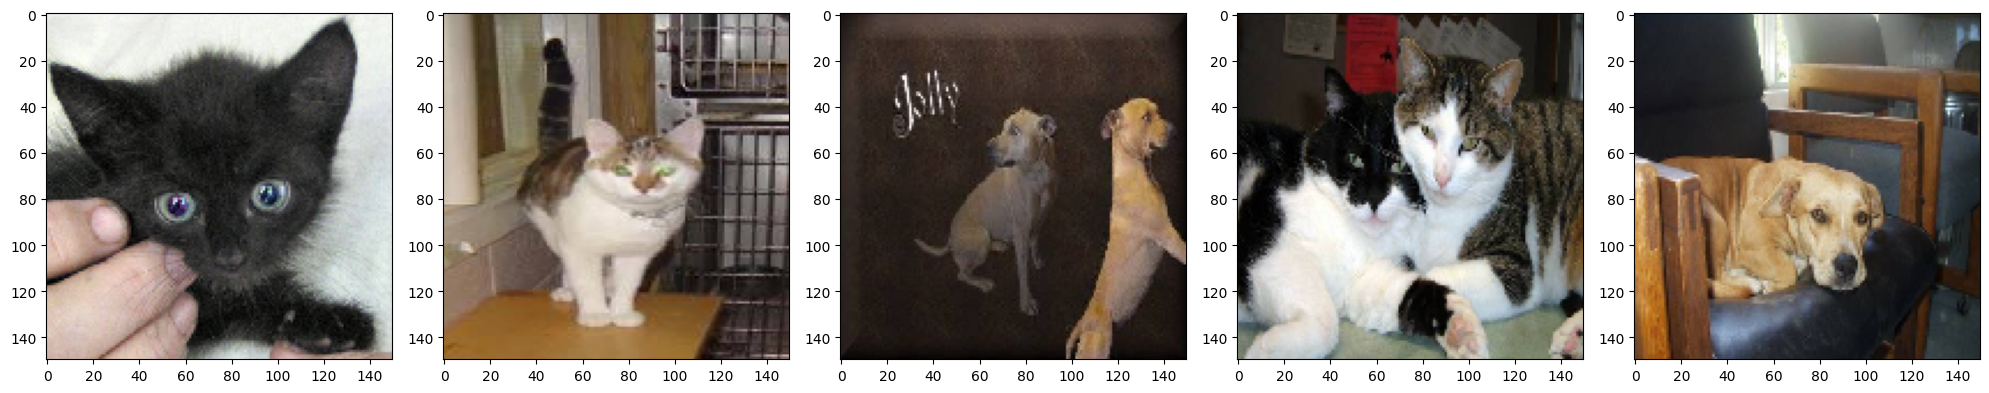

In [15]:
# checking if rescaling occured
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

**Creating model**

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
# training model
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

# visualizing model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

<ipython-input-21-67a59bc3ca8d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 18s 313ms/step - loss: 0.7512 - accuracy: 0.5250 - val_loss: 0.6873 - val_accuracy: 0.6320
Epoch 2/100
20/20 [==============================] - 5s 255ms/step - loss: 0.6836 - accuracy: 0.5670 - val_loss: 0.6747 - val_accuracy: 0.5760
Epoch 3/100
20/20 [==============================] - 5s 249ms/step - loss: 0.6654 - accuracy: 0.5820 - val_loss: 0.6346 - val_accuracy: 0.6270
Epoch 4/100
20/20 [==============================] - 6s 298ms/step - loss: 0.6427 - accuracy: 0.6155 - val_loss: 0.6106 - val_accuracy: 0.6740
Epoch 5/100
20/20 [==============================] - 5s 270ms/step - loss: 0.6027 - accuracy: 0.6705 - val_loss: 0.6002 - val_accuracy: 0.6820
Epoch 6/100
20/20 [==============================] - 7s 355ms/step - loss: 0.5536 - accuracy: 0.7115 - val_loss: 0.5905 - val_accuracy: 0.6820
Epoch 7/100
20/20 [==============================] - 5s 247ms/step - loss: 0.5165 - accuracy: 0.7500 - val_loss: 0.5724 - val_accuracy: 0.691

KeyboardInterrupt: ignored